<a href="https://colab.research.google.com/github/Davincchi/seminario/blob/main/Seminario_evidencia_17-18_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install pandas matplotlib jupyter


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 81.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.9/386.9 kB 26.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.5/133.5 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 66.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 6.0 MB/s eta 0:00:00
  Attempting uninstall: jupyter-client
    Found existing installation: jupyter-client 6.1.12
    Uninstalling jupyter-client-6.1.12:
      Successfully uninstalled jupyter-client-6.1.12
  Attempting uninstall: jupyter-server
    Found existing installation: jupyter-server 1.16.0
    Uninstalling jupyter-server-1.16.0:
      Successfully uninstalled jupyter-server-1.16.0


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
aeropuerto_df = pd.read_csv('http://raw.githubusercontent.com/Davincchi/seminario/refs/heads/main/salida_mensual_pasajeros_aeropuerto_destino_internacional.csv')

In [6]:
column_rename_map = {"sal_codigo": "codigo_pais",
                    "sal_destinoint": "pais_destino", "sal_indicador": "indicador_salida", "sal_indicador": "indicador_salida", "sal_periodo": "periodo", "sal_valor": "valor_salida"}

In [7]:
aeropuerto_df_renombrado = aeropuerto_df.rename(columns=column_rename_map)

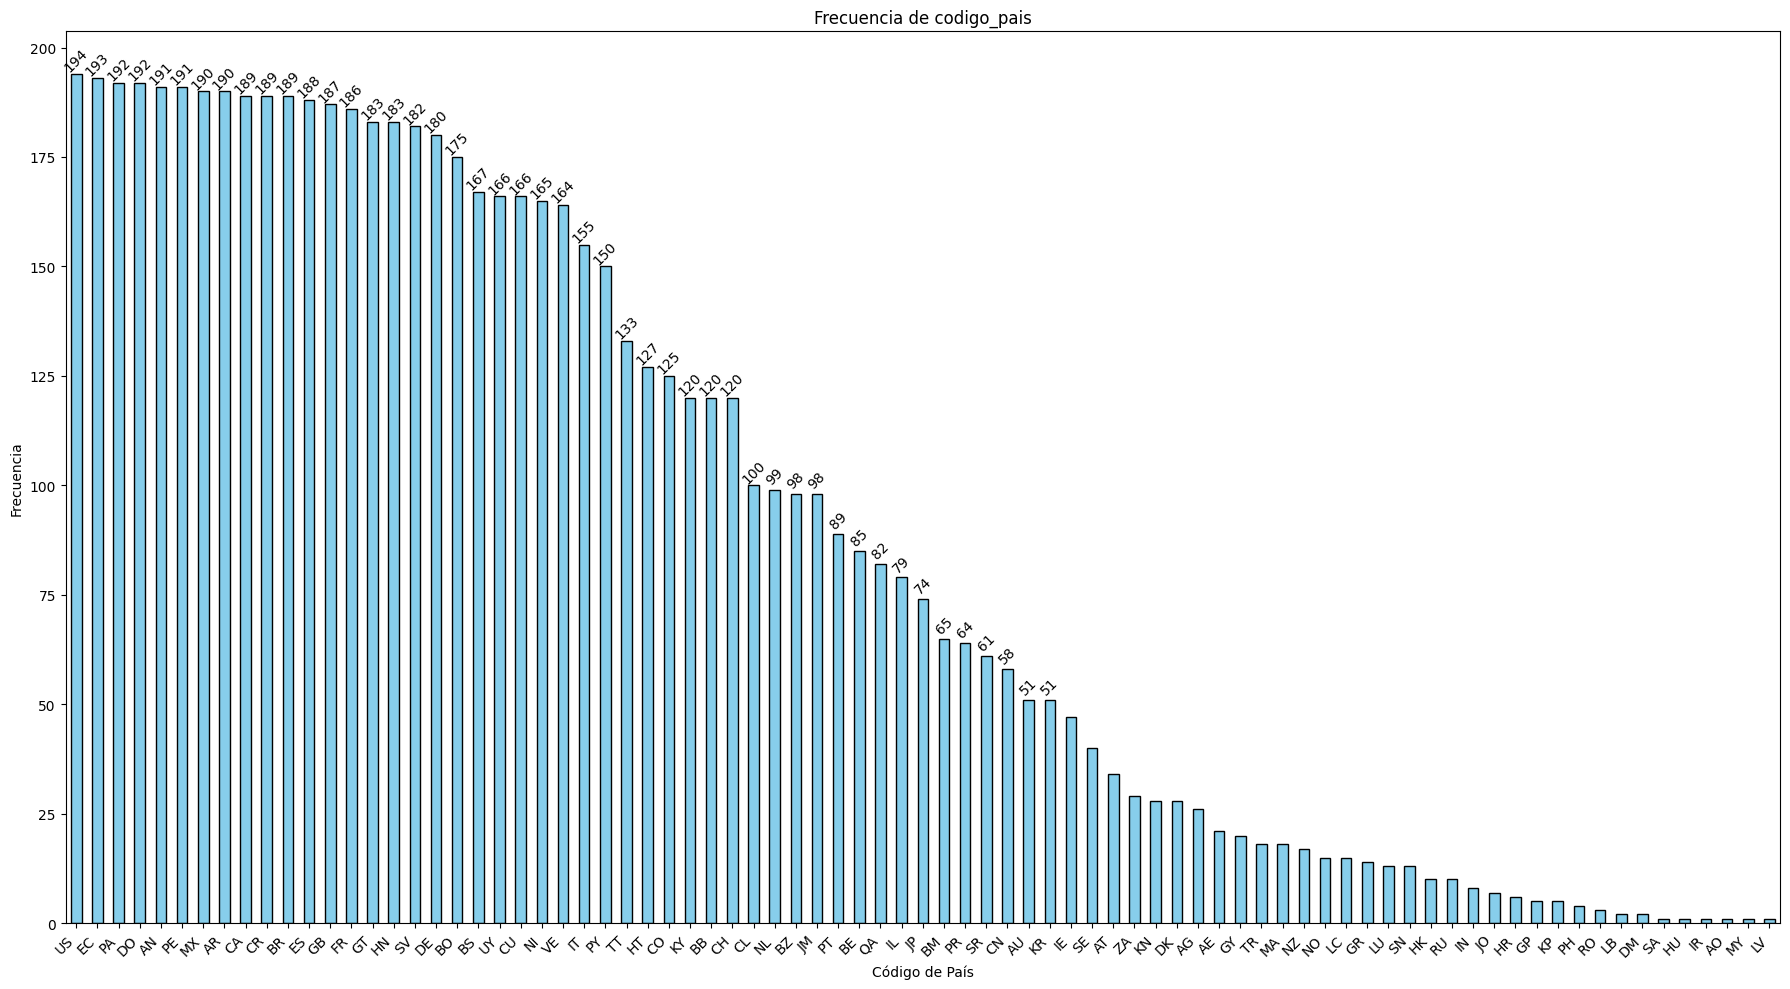

In [8]:
plt.figure(figsize=(18, 10))
frecuencia_paises = aeropuerto_df_renombrado['codigo_pais'].value_counts()

ax = frecuencia_paises.plot(kind='bar', color='skyblue', edgecolor='black')
umbral = 50

for p in ax.patches:
    if p.get_height() > umbral:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points', rotation=45)
plt.xticks(rotation=45, ha='right')

plt.title('Frecuencia de codigo_pais')

plt.xlabel('Código de País')

plt.ylabel('Frecuencia')

plt.tight_layout()

plt.show()

La frecuencia de registros por país varía significativamente. Los primeros países en la lista (por ejemplo, US, EC, PA y DO), tienen una frecuencia muy alta en comparación con otros países. Hay una disminución gradual en la frecuencia a medida que se avanza hacia la derecha en el gráfico, lo que indica que hay países con muy pocos registros. La gráfica presenta una "cola larga" (long tail) donde muchos países tienen una frecuencia baja, Esto sugiere que mientras unos pocos destinos son muy comunes, hay una gran cantidad de destinos que son relativamente infrecuentes.

ValueError: where size (1) does not match 'x' size (194)

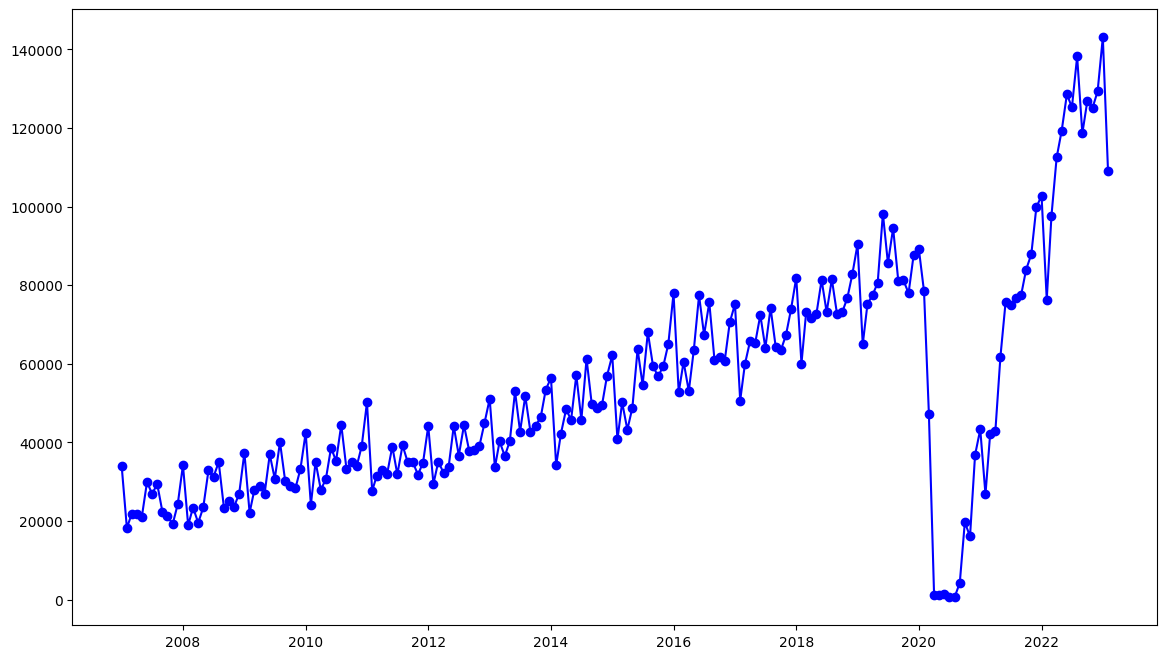

In [14]:
aeropuerto_df_renombrado['periodo'] = pd.to_datetime(aeropuerto_df_renombrado['periodo'], format='%Y%m')
tendencias_temporales = aeropuerto_df_renombrado.groupby('periodo')['valor_salida'].sum().reset_index()

plt.figure(figsize=(14, 8))
plt.plot(tendencias_temporales['periodo'], tendencias_temporales['valor_salida'], marker='o', linestyle='-', color='blue', label='Valor de Salida')
punMa = 0
punMi = 0
for i in range(len(tendencias_temporales)):
    y = tendencias_temporales.loc[i+1, 'valor_salida']
    x = tendencias_temporales.loc[i, 'periodo']

    # Usar el valor de y en una condición
    if y > punMa:
        plt.fill_between(tendencias_temporales['periodo'], 0, tendencias_temporales['valor_salida'], where=(y>punMa), color='lightgreen', alpha=0.5)
        punMa = y
    elif y<punMi:
        plt.fill_between(tendencias_temporales['periodo'], 0, tendencias_temporales['valor_salida'], where=(y<punMi), color='lightcoral', alpha=0.5)
        punMi = y
        punMa = y
    else:
        plt.fill_between(tendencias_temporales['periodo'], 0, tendencias_temporales['valor_salida'], where=(1==1), color='lightgreen', alpha=0.5)

# plt.fill_between(tendencias_temporales['periodo'], tendencias_temporales['valor_salida'], color='skyblue', alpha=0.3)
# plt.fill_between(tendencias_temporales['periodo'], 0, tendencias_temporales['valor_salida'], where=(tendencias_temporales['periodo'] < '2020-01-01'), color='lightgreen', alpha=0.5, label='Antes de 2020')
# plt.fill_between(tendencias_temporales['periodo'], 0, tendencias_temporales['valor_salida'], where=(tendencias_temporales['periodo'] >= '2020-01-01'), color='lightcoral', alpha=0.5, label='Desde 2020')

plt.title('Tendencia de valor_salida a lo largo del tiempo')
plt.xlabel('Periodo')
plt.ylabel('Valor de Salida')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

A lo largo de los años, hay una tendencia general ascendente en el valor de salidas de pasajeros, esto sugiere un crecimiento en el número de salidas de pasajeros a lo largo del tiempo. Es posible que ciertos meses del año vean un aumento o disminución en el número de salidas, lo cual es común en la industria de viajes debido a las vacaciones y otros factores estacionales. Hay una caída pronunciada y significativa en el valor de salidas de pasajeros alrededor de 2020. Esta caída puede corresponder al inicio de la pandemia de COVID-19, que tuvo un fuerte impacto en los viajes internacionales. Posteriormente, se observa una recuperación a medida que avanza el tiempo hacia 2021 y 2022, aunque con cierta volatilidad.

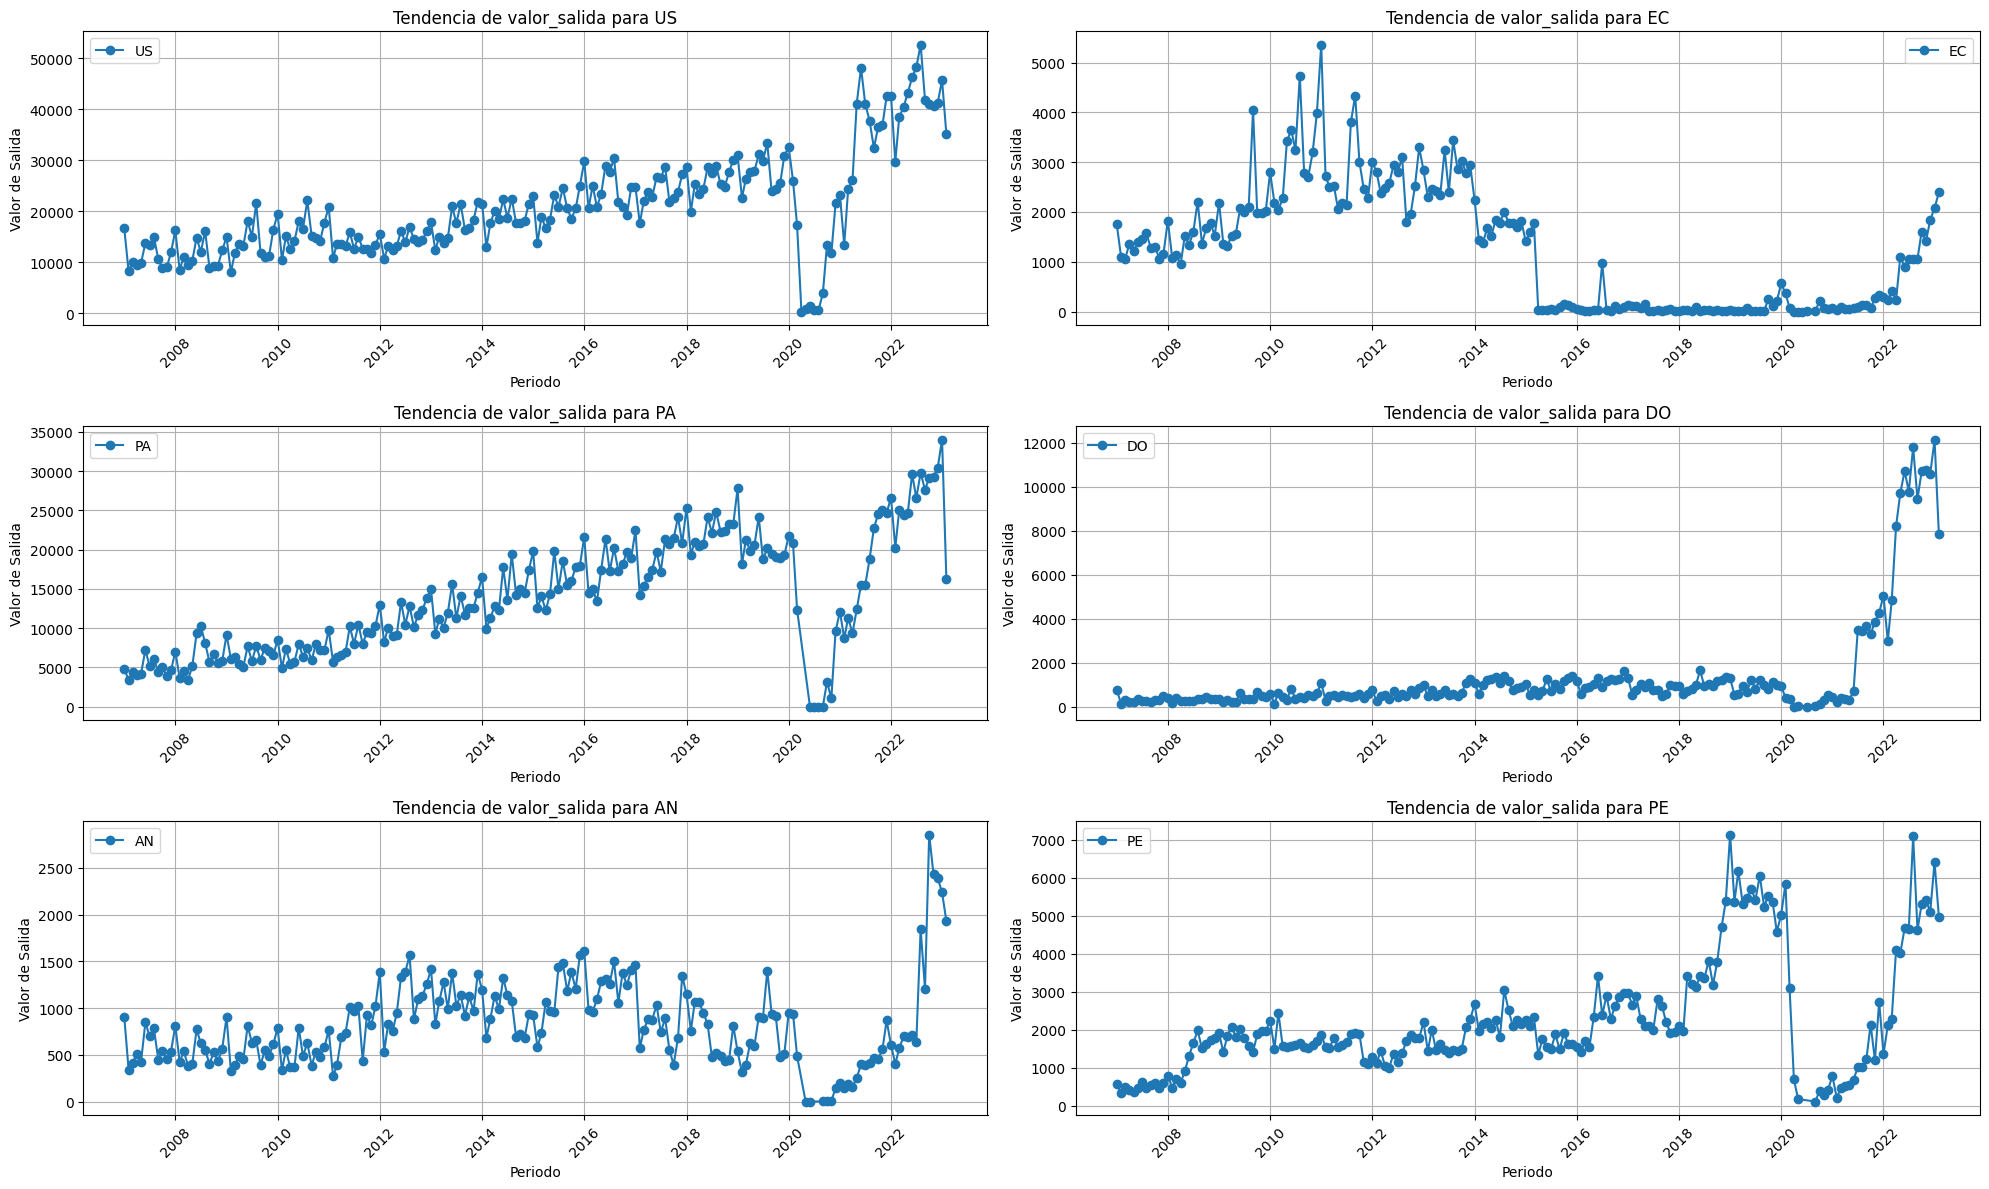

In [11]:
top_6_paises = aeropuerto_df_renombrado['codigo_pais'].value_counts().head(6).index

plt.figure(figsize=(20, 12))

for i, pais in enumerate(top_6_paises, 1):
    pais_data = aeropuerto_df_renombrado[aeropuerto_df_renombrado['codigo_pais'] == pais].copy()
    pais_data.loc[:, 'periodo'] = pd.to_datetime(pais_data['periodo'], format='%Y%m')
    tendencias_pais = pais_data.groupby('periodo')['valor_salida'].sum().reset_index()

    # Subgráfica individual para cada país
    plt.subplot(3, 2, i)
    plt.plot(tendencias_pais['periodo'], tendencias_pais['valor_salida'], marker='o', linestyle='-', label=pais)
    plt.title(f'Tendencia de valor_salida para {pais}')
    plt.xlabel('Periodo')
    plt.ylabel('Valor de Salida')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.legend()

plt.tight_layout()
plt.show()

Las gráficas muestran una tendencia de crecimiento similar en: US, PA, AN y PE, con un aumento constante hasta 2019. Hay una caída en 2020, seguida por una recuperación en 2021 y 2022. En EC tuvo un periodo de crecimiento hasta 2012, seguido de una disminución, un impacto de la pandemia en 2020, y una recuperación fuerte en 2022. En DO mantuvo una tendencia estable con un aumento gradual desde 2018, un impacto moderado de la pandemia, y una fuerte recuperación en 2022.

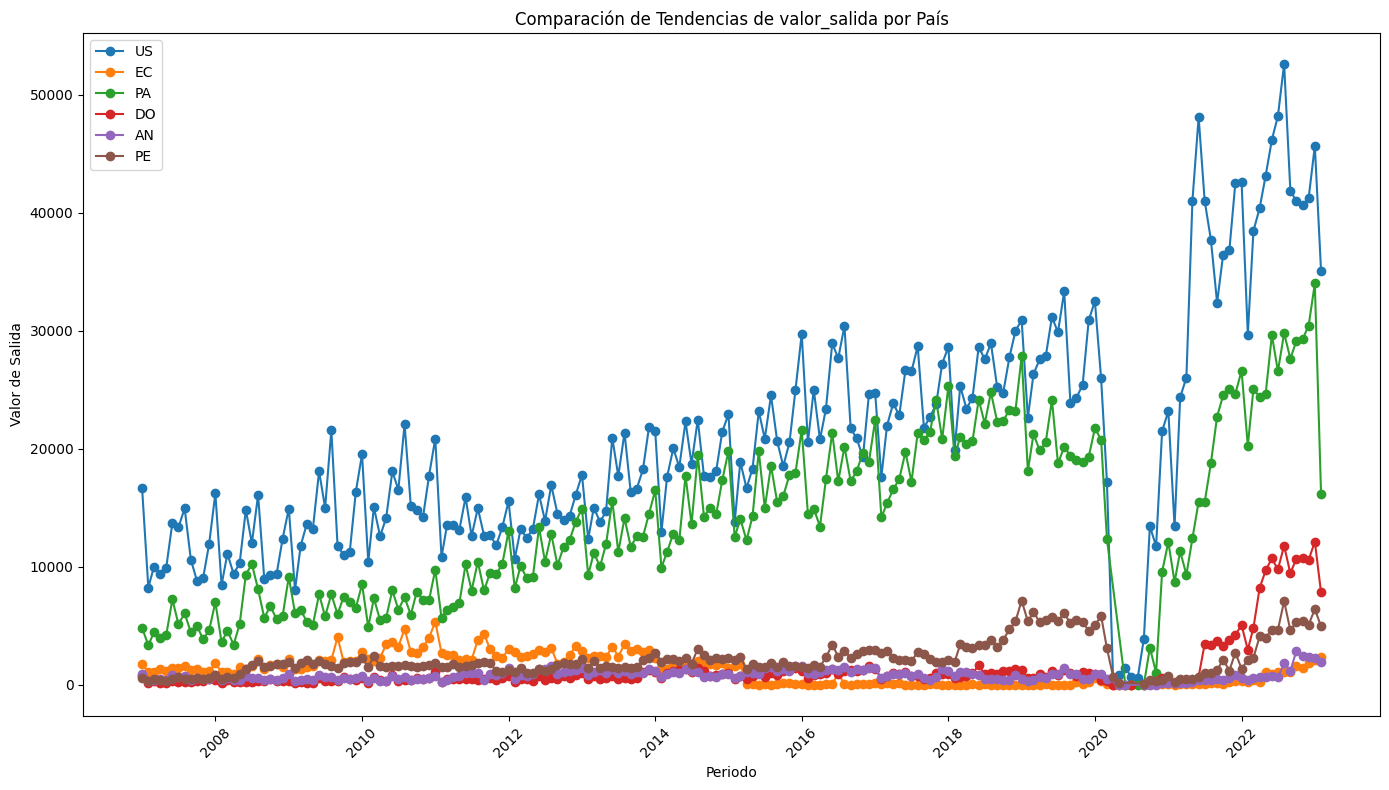

In [18]:
plt.figure(figsize=(14, 8))
for pais in top_6_paises:
    pais_data = aeropuerto_df_renombrado[aeropuerto_df_renombrado['codigo_pais'] == pais]
    tendencias_pais = pais_data.groupby('periodo')['valor_salida'].sum().reset_index()
    plt.plot(tendencias_pais['periodo'], tendencias_pais['valor_salida'], marker='o', linestyle='-', label=pais)

plt.title('Comparación de Tendencias de valor_salida por País')
plt.xlabel('Periodo')
plt.ylabel('Valor de Salida')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Impacto de la Pandemia: Todos los países muestran una caída notable alrededor de 2020 debido a la pandemia de COVID-19. Esta caída es más pronunciada en Estados Unidos y Ecuador. Recuperación Post-pandemia: La recuperación post-pandemia es más evidente en Estados Unidos y Ecuador, con valores de salida que superan los niveles pre-pandemia. Panamá y República Dominicana también muestran recuperación, aunque más gradual. Variabilidad: Estados Unidos muestra la mayor variabilidad en los valores de salida, con picos y caídas pronunciados. Otros países como Ecuador y Panamá tienen variabilidades más moderadas. Tendencias de Crecimiento: A lo largo de los años, Estados Unidos y Ecuador muestran las tendencias de crecimiento más fuertes, lo que podría indicar un aumento en la popularidad de estos destinos o un crecimiento en el tráfico aéreo internacional.

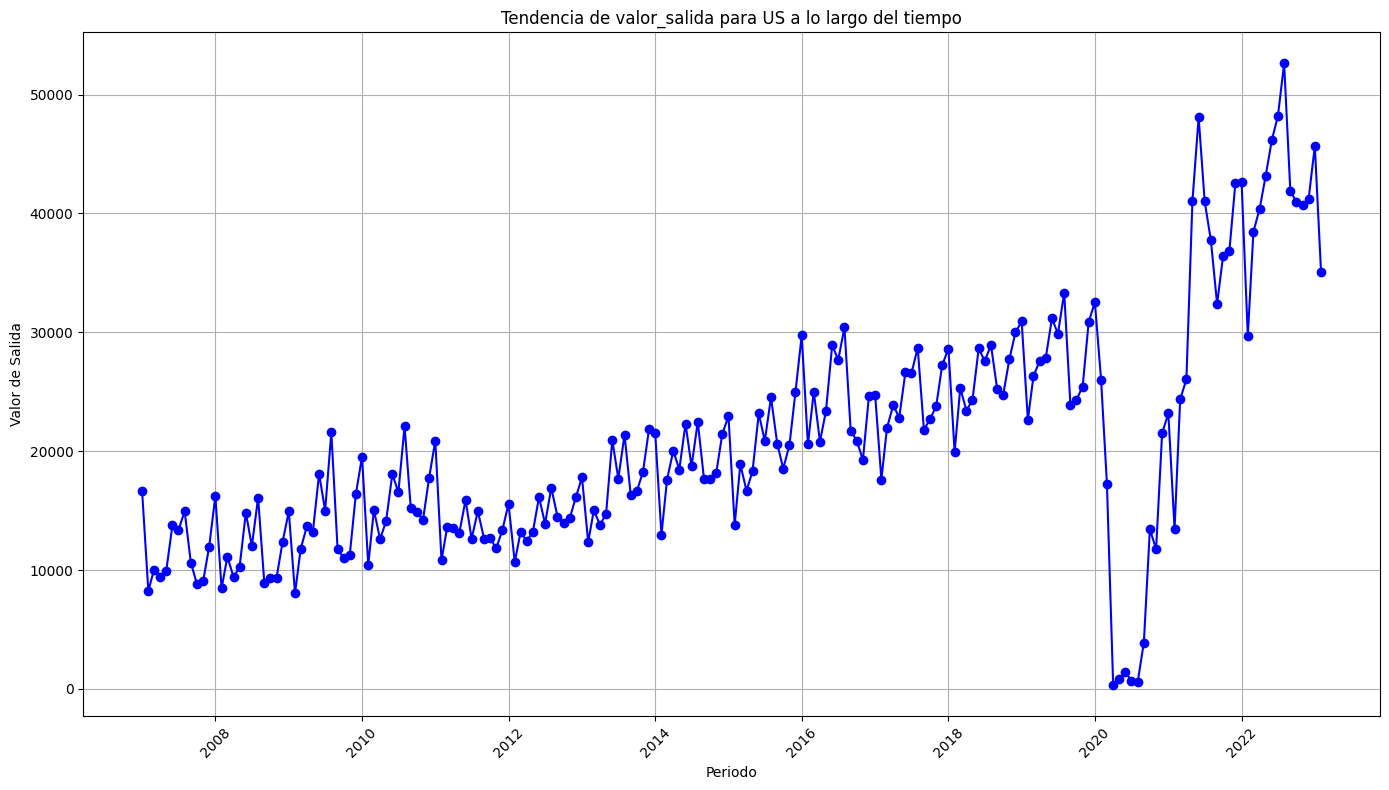

      año  mes  valor_salida
0    2007    1         16643
12   2008    1         16222
31   2009    8         21576
43   2010    8         22100
48   2011    1         20874
67   2012    8         16918
83   2013   12         21843
91   2014    8         22464
107  2015   12         24995
115  2016    8         30412
127  2017    8         28697
143  2018   12         29988
151  2019    8         33343
156  2020    1         32512
173  2021    6         48102
187  2022    8         52617
192  2023    1         45666


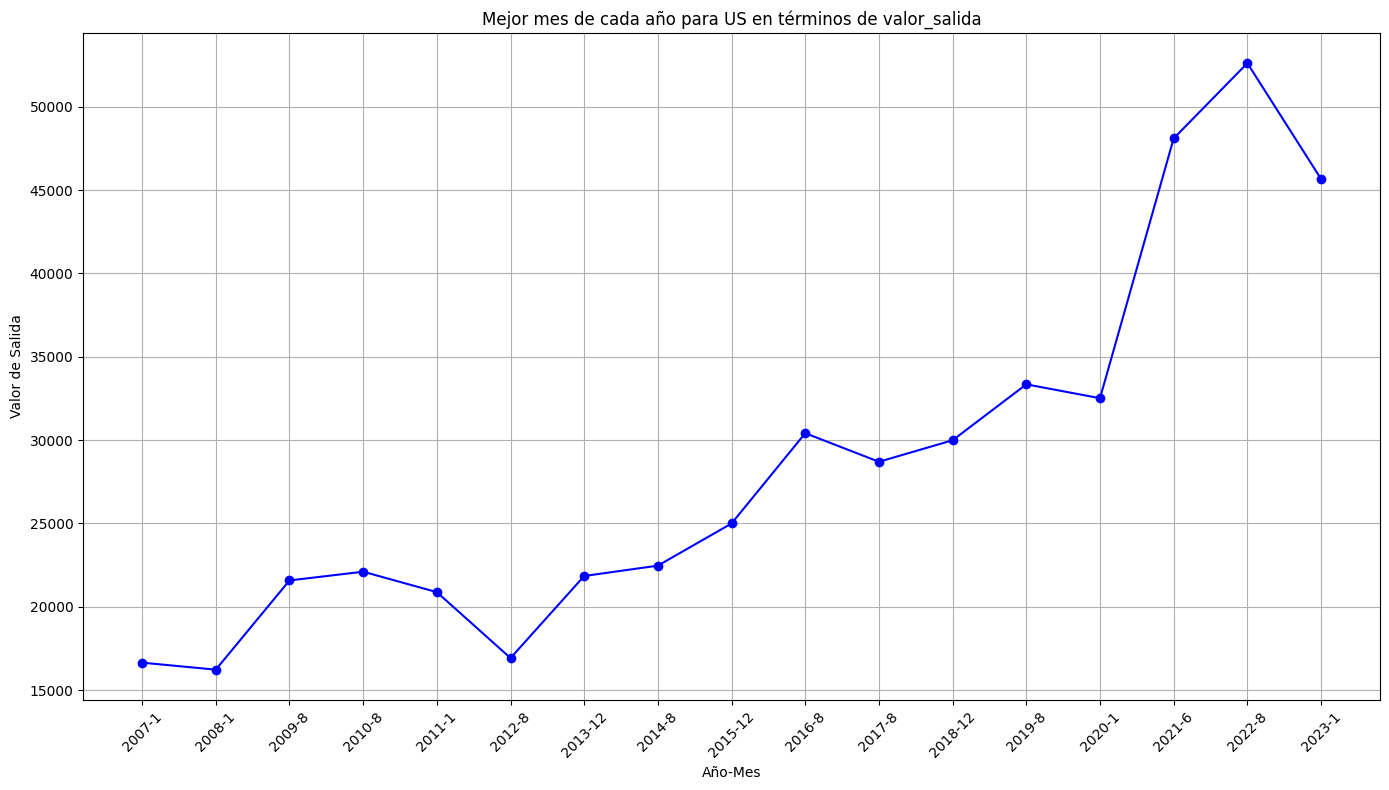

La moda del mes es: 8


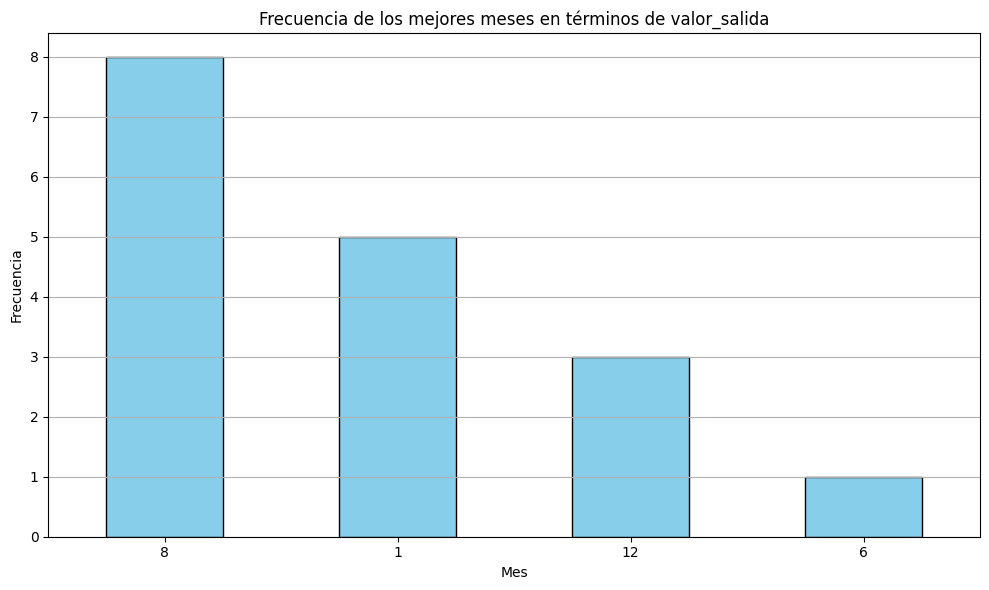

In [19]:
us_data = aeropuerto_df_renombrado[aeropuerto_df_renombrado['codigo_pais'] == 'US'].copy()
us_data.loc[:, 'periodo'] = pd.to_datetime(us_data['periodo'], format='%Y%m')
tendencias_us = us_data.groupby('periodo')['valor_salida'].sum().reset_index()

plt.figure(figsize=(14, 8))
plt.plot(tendencias_us['periodo'], tendencias_us['valor_salida'], marker='o', linestyle='-', color='b')
plt.title('Tendencia de valor_salida para US a lo largo del tiempo')
plt.xlabel('Periodo')
plt.ylabel('Valor de Salida')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


us_data = aeropuerto_df_renombrado[aeropuerto_df_renombrado['codigo_pais'] == 'US'].copy()
us_data.loc[:, 'periodo'] = pd.to_datetime(us_data['periodo'], format='%Y%m')
us_data['año'] = us_data['periodo'].dt.year
us_data['mes'] = us_data['periodo'].dt.month
mejor_mes_por_año = us_data.groupby(['año', 'mes'])['valor_salida'].sum().reset_index()
mejor_mes_por_año = mejor_mes_por_año.loc[mejor_mes_por_año.groupby('año')['valor_salida'].idxmax()]
print(mejor_mes_por_año)

plt.figure(figsize=(14, 8))
plt.plot(mejor_mes_por_año['año'].astype(str) + '-' + mejor_mes_por_año['mes'].astype(str),
         mejor_mes_por_año['valor_salida'], marker='o', linestyle='-', color='b')
plt.title('Mejor mes de cada año para US en términos de valor_salida')
plt.xlabel('Año-Mes')
plt.ylabel('Valor de Salida')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

moda_mes = mejor_mes_por_año['mes'].mode()[0]
print(f"La moda del mes es: {moda_mes}")
frecuencia_meses = mejor_mes_por_año['mes'].value_counts()

plt.figure(figsize=(10, 6))
frecuencia_meses.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Frecuencia de los mejores meses en términos de valor_salida')
plt.xlabel('Mes')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Podemos decir que Agosto es el mejor mes para salidas a Estados Unidos puede ser debido a una combinación de factores como: las vacaciones escolares de verano, el clima favorable, eventos y festivales, promociones de viajes, y la estacionalidad general en la industria del turismo. Estos factores contribuyen a un aumento significativo en el valor_salida durante este mes.

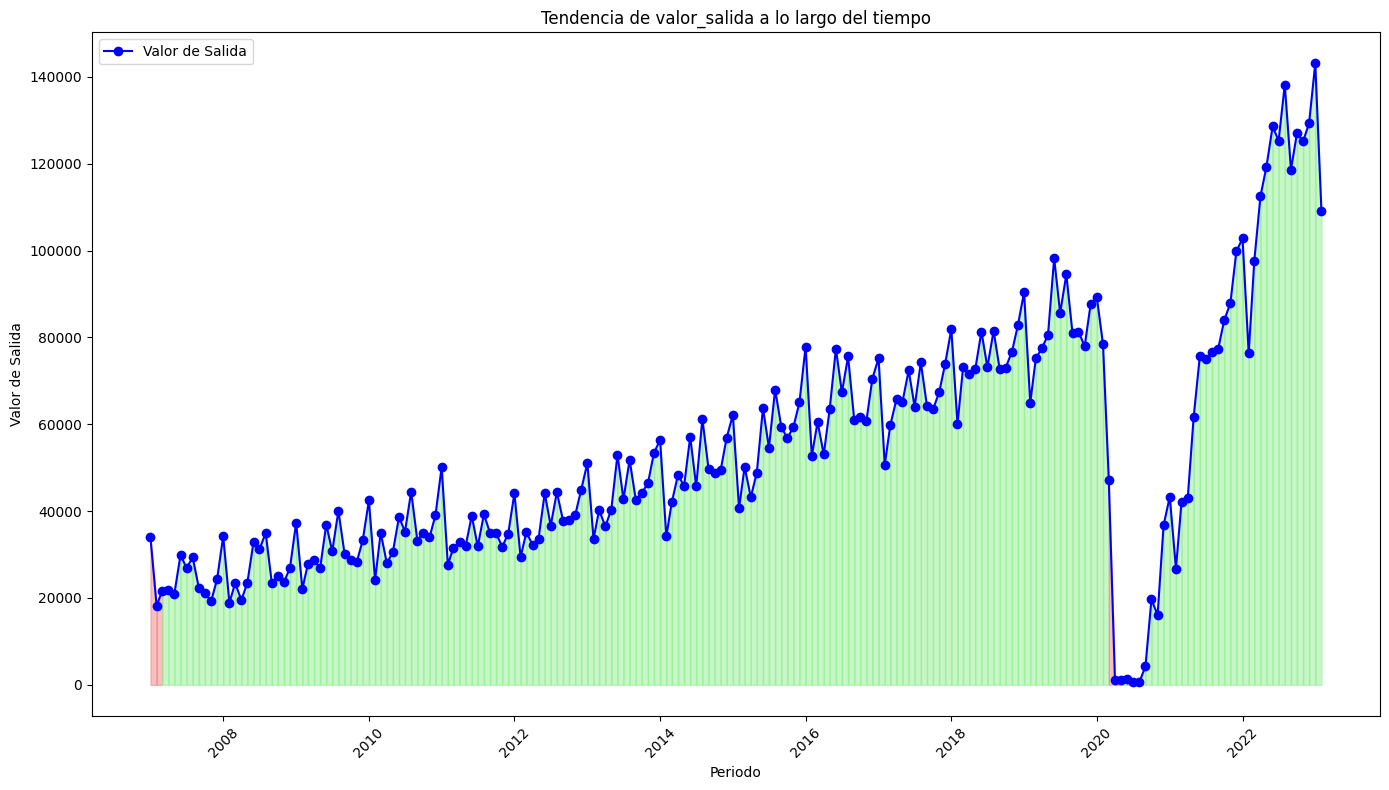

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

aeropuerto_df_renombrado['periodo'] = pd.to_datetime(aeropuerto_df_renombrado['periodo'], format='%Y%m')
tendencias_temporales = aeropuerto_df_renombrado.groupby('periodo')['valor_salida'].sum().reset_index()

plt.figure(figsize=(14, 8))
plt.plot(tendencias_temporales['periodo'], tendencias_temporales['valor_salida'], marker='o', linestyle='-', color='blue', label='Valor de Salida')

punMa = 0
punMi = tendencias_temporales.loc[0, 'periodo']
core = 'lightgreen'


for i in range(len(tendencias_temporales) - 1):  # -1 para no salirte del índice
    y_actual = tendencias_temporales.loc[i, 'valor_salida']
    y_siguiente = tendencias_temporales.loc[i + 1, 'valor_salida']

    x_actual = tendencias_temporales.loc[i, 'periodo']
    x_siguiente = tendencias_temporales.loc[i + 1, 'periodo']

    x_rango = [x_actual, x_siguiente]
    y_rango = [y_actual, y_siguiente]

    if y_siguiente > punMi:
        core = 'lightgreen'
        plt.fill_between(x_rango, y_rango, color=core, alpha=0.5)
        punMa = y_actual
    elif y_siguiente < punMi:
        punMi = y_actual
        core = 'lightcoral'
        plt.fill_between(x_rango, y_rango, color=core, alpha=0.5)
    else:
        core = core
        plt.fill_between(x_rango, y_rango, color=core, alpha=0.5)

# Etiquetas
plt.title('Tendencia de valor_salida a lo largo del tiempo')
plt.xlabel('Periodo')
plt.ylabel('Valor de Salida')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
